## Step 1:Importing datasets and libraries, checking datatype, statistical summary,etc.

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.linear_model import LogisticRegression ##for logistic regression model,to be used in step 7
from sklearn.ensemble import RandomForestClassifier  ##for random forest classifier model,to be used in step 9

In [6]:
from google.colab import files ##uploading the csv file
uploadedfiles=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [7]:
import io
dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv') ##reading the csv file

In [ ]:
#for displaying the top 5 rows
dataset.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#for displaying the last 5 rows
dataset.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Checking the types of data and basic summary statistics



In [7]:
dataset.shape ##displays the number of rows and columns

(5000, 14)

In [ ]:
#to display datatype of ech column and also display the non null rows for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#to display the summary stats which include count,mean,std,min,max,etc
dataset.describe()  #check for outliers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#to display how many null values are present in each column
dataset.isnull().sum()  #check for negative values and replace it by median if negative values are not possible

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
for column in dataset.columns:
    print(f' Unique values in {column} is {len(dataset[column].unique())}') ##displays the number of unique values in each column

 Unique values in ID is 5000
 Unique values in Age is 45
 Unique values in Experience is 47
 Unique values in Income is 162
 Unique values in ZIP Code is 467
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


### Step 2: Data cleansing

In [ ]:
experience=dataset['Experience']
age=dataset['Age']
correlation = experience.corr(age)
correlation #checking how correlated age and experience are

0.9942148569683321

In [ ]:
dataset=dataset.drop(['ID','Experience'],axis=1) #since these two columns have no effect on data we require
dataset.head(5) #displays top 5 values after dropping the two columns

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


## Step 3:EDA

In [ ]:
#to find the number of unique
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
##number of people with zero mortgage
##there are 3462 people with 0 mortgage out of 5000(making it skewed)
(dataset.Mortgage==0).sum()

3462

In [ ]:
##no of people with 0 credit card spending per month
##there are 106 peole with 0 average credit card spending per month
(dataset.CCAvg==0).sum()

106

In [ ]:
##value count for all categorical columns
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataset['CreditCard'].value_counts() 

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**Univariate and bivariate Analysis**

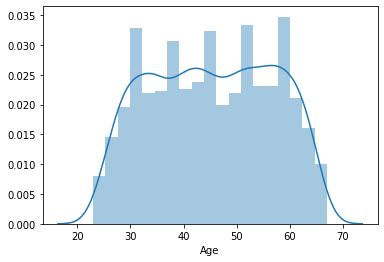

In [ ]:
##Univariate Analysis
sns.distplot(dataset.Age);
##from the plot,we observe that age has a symmetric distribution

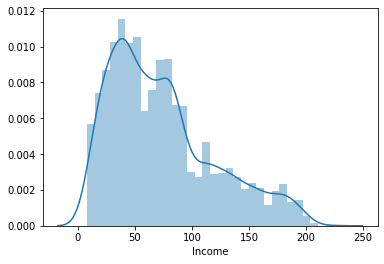

In [ ]:
sns.distplot(dataset.Income);
##from the plot,we can conclude that income has a right skewed distribution

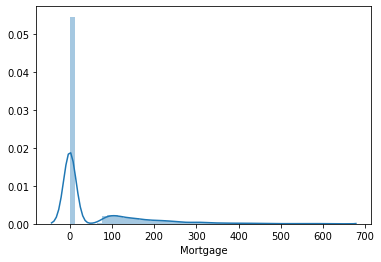

In [ ]:
sns.distplot(dataset.Mortgage);

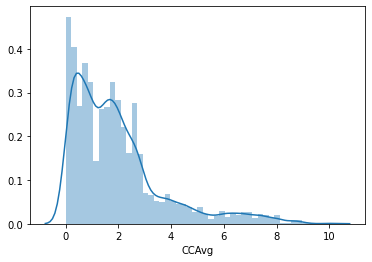

In [10]:
sns.distplot(dataset.CCAvg)


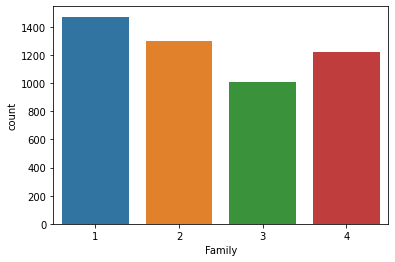

In [ ]:
sns.countplot(dataset.Family);

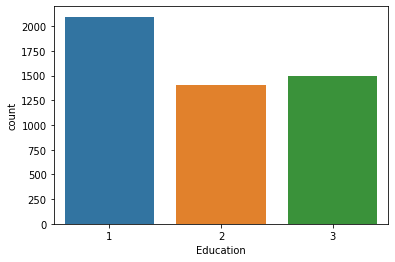

In [ ]:
sns.countplot(dataset.Education);

##Multivariate Analysis

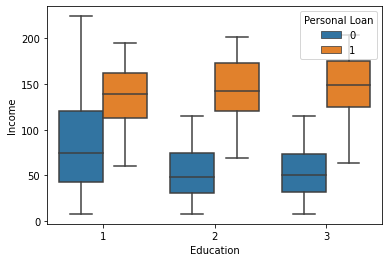

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset); ##customers with more income is granted loan across each education level

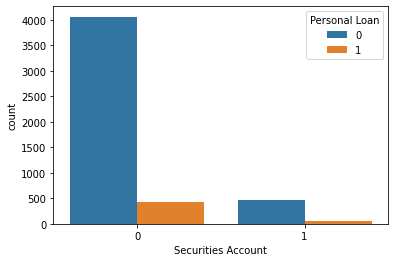

In [ ]:
sns.countplot(x='Securities Account',data=dataset,hue='Personal Loan');

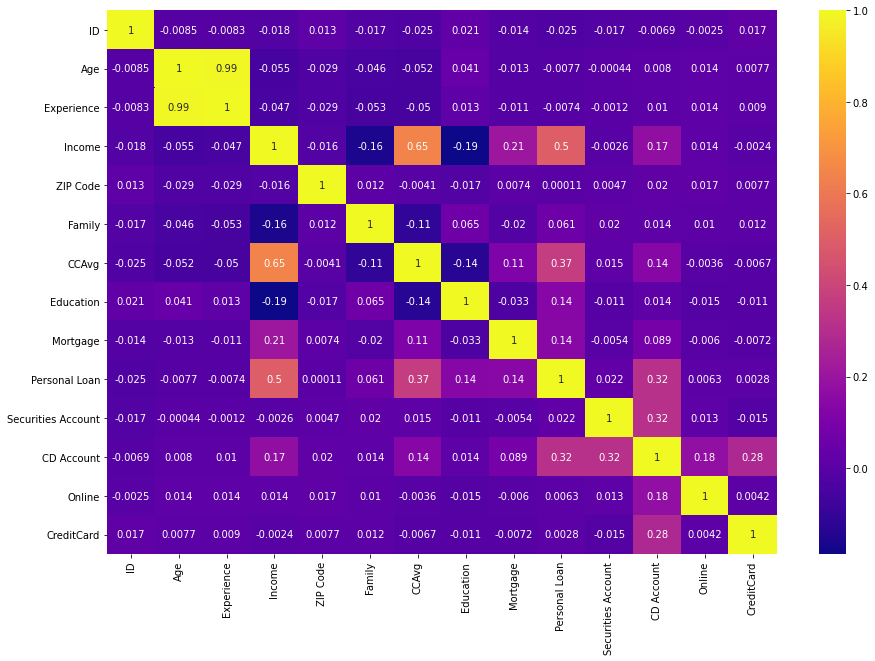

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma', annot=True);

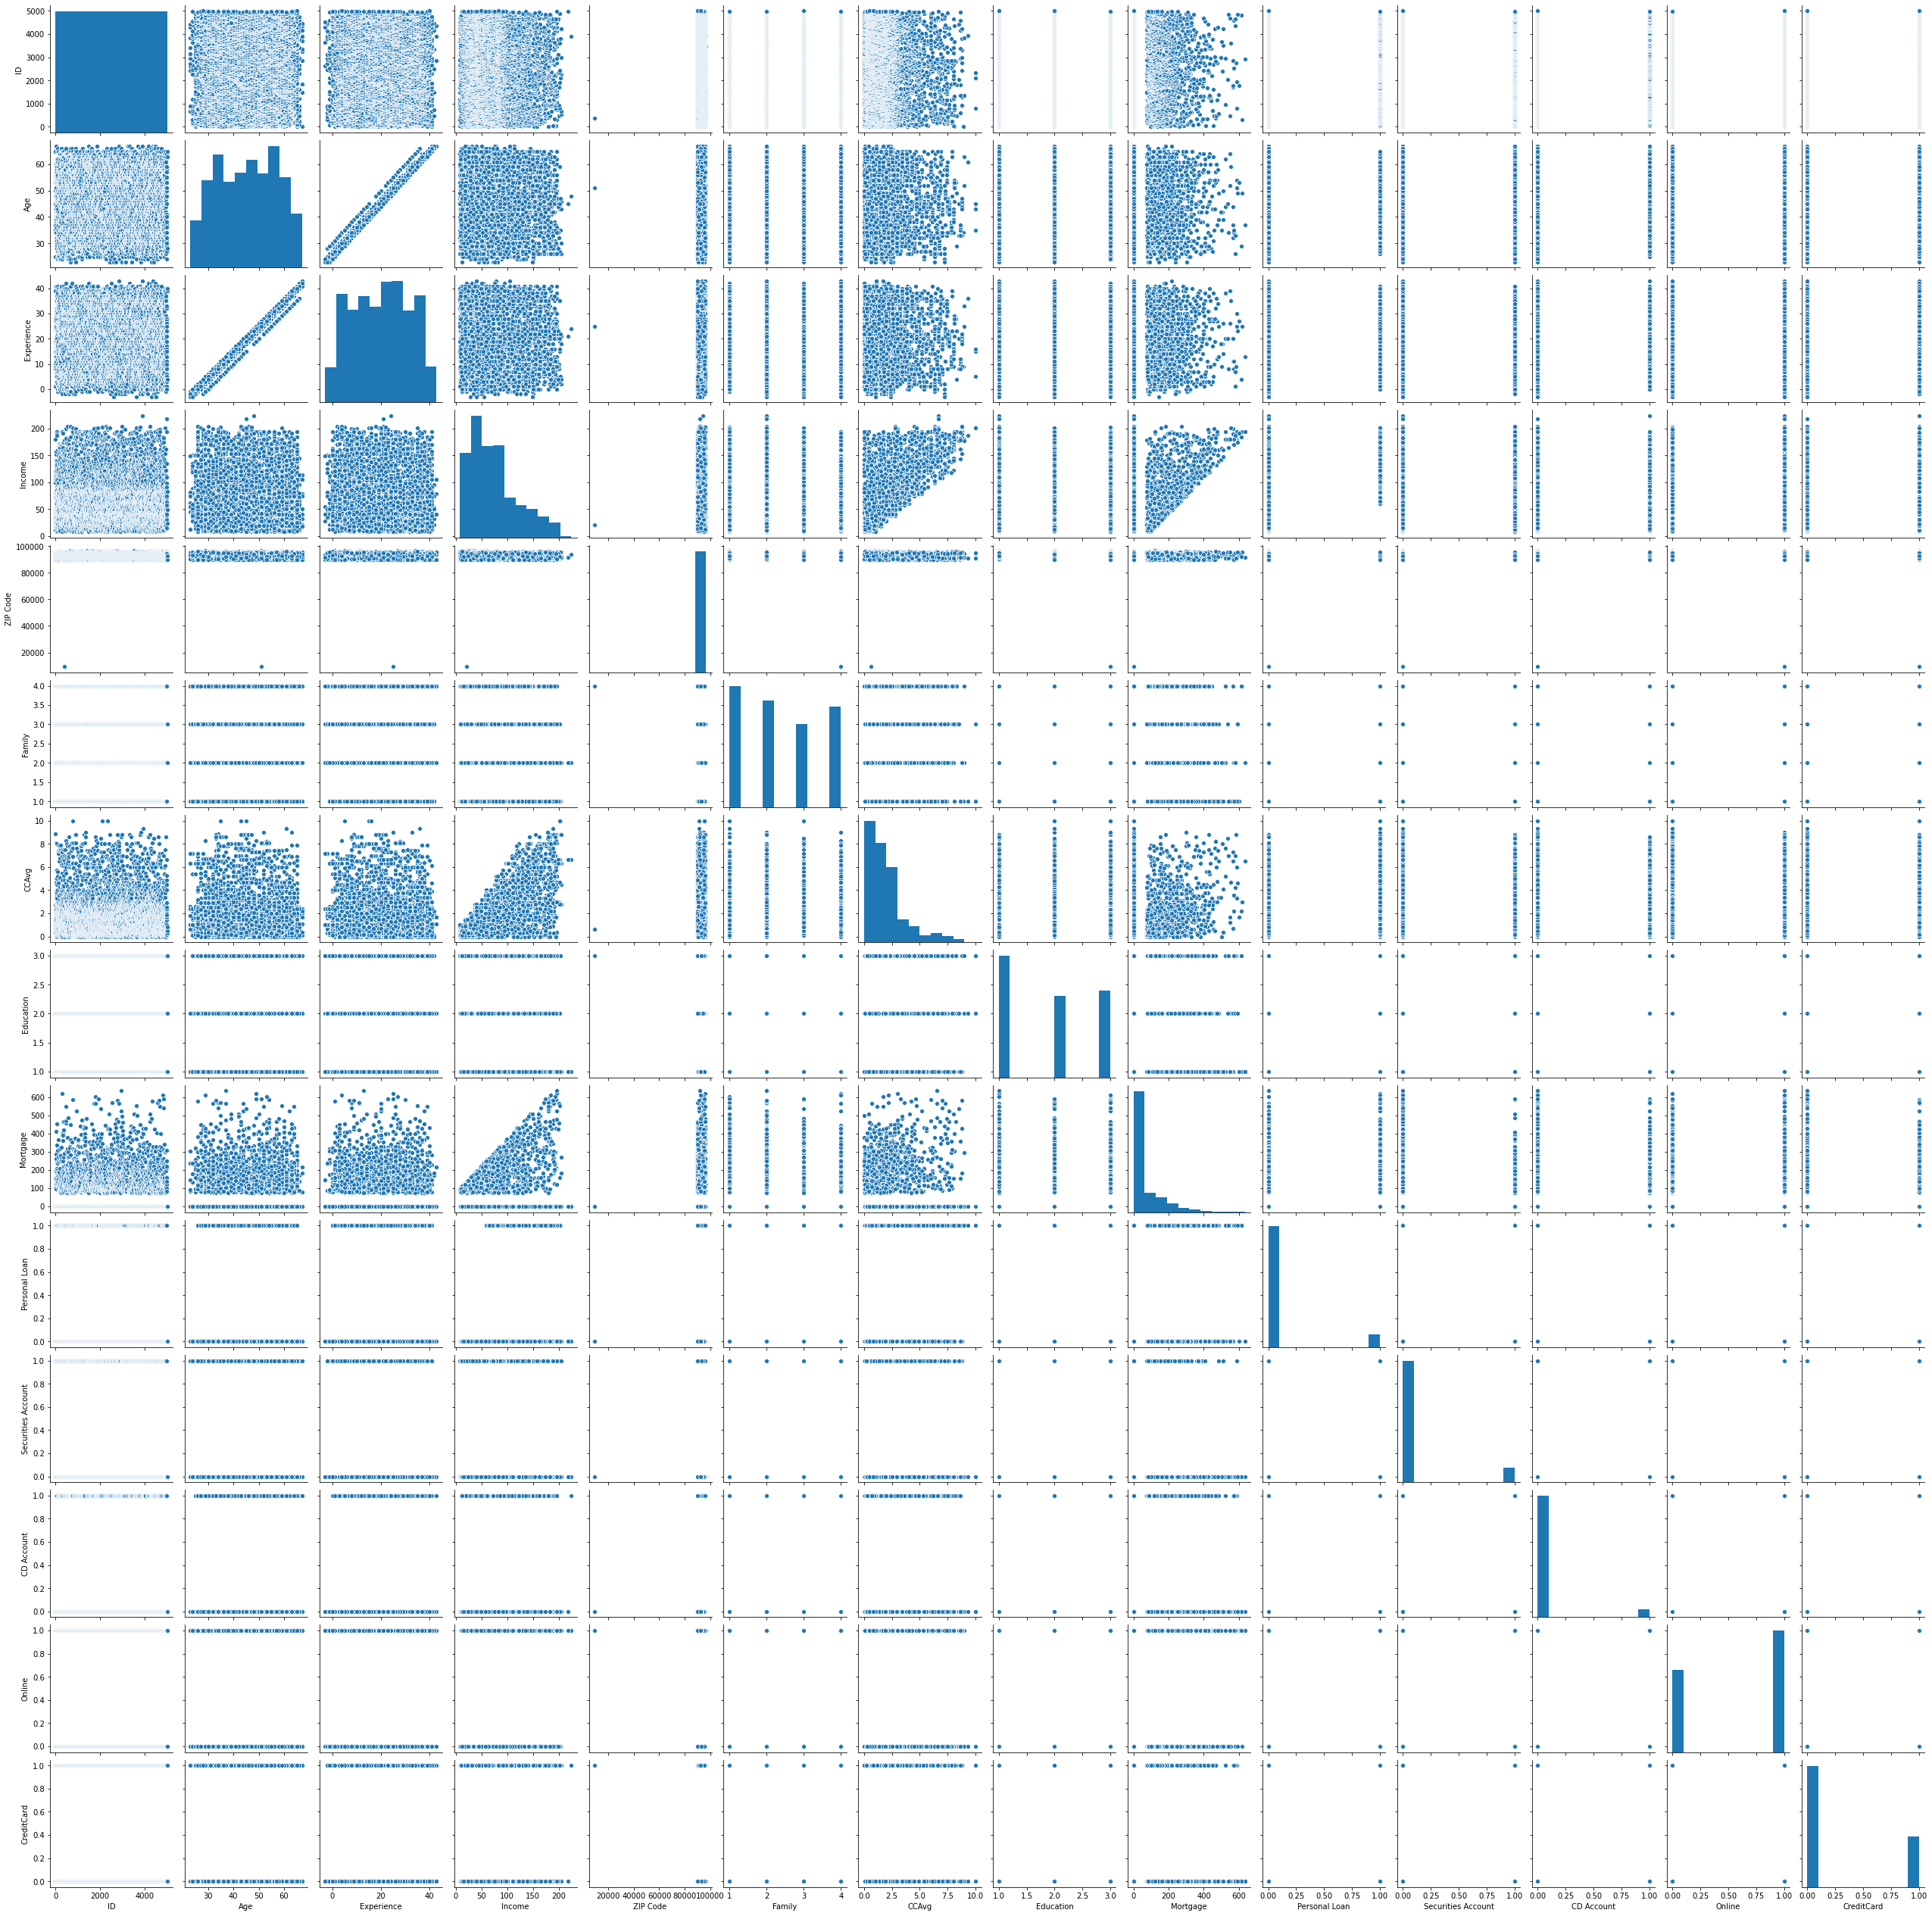

In [ ]:
sns.pairplot(dataset)

# Step 4:Transformations of feature variables


In [5]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

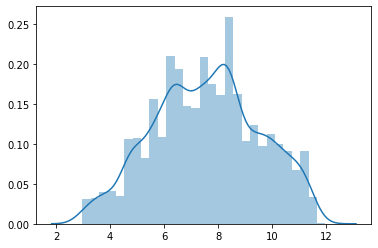

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
temp=pt.transform(data_X['Income'].values.reshape(-1,1))
sns.distplot(temp);

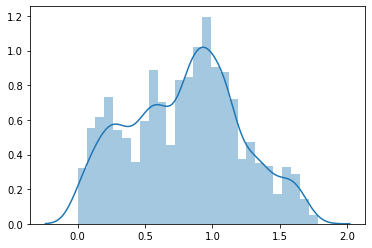

In [ ]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp=pt.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(temp);

In [ ]:
data_X['Mortgage_Int']=pd.cut(data_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop('Mortgage',axis=1,inplace=True)

In [ ]:
data_X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1,49,91107,4,1.6,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,1,0


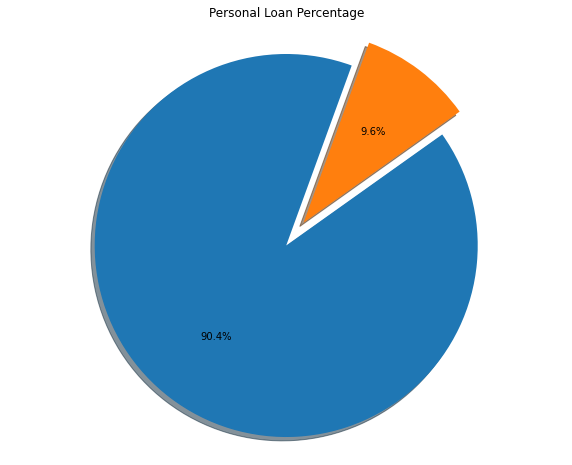

In [ ]:
##Univariate analysis
##9.6% of all the applicants get approved for personal loan
tempDF=pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()
tempDF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')#equal aspect ratio ensures that pie is drawn as a circle
plt.title('Personal Loan Percentage')
plt.show()


In [12]:
dataset.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)  ##we drop the ID and ZIP Code columns because they are irrelevent and Experience because it is highly correleted to Age

Zipcode is a categorical variable.

Nominal-no order in the values Ordinal-there's a fixed order ML models only understand numerical values Label encoding-convert values into seq

Zipcode is a nomianl behviour->conver to numerical using One hot encoding->There will be a number of dummy variables which may be highly correalted and they don't add to this ML model and therefore Zipcode is dropped.

Normalizing the data means normalizing the distribution like by using power transform to skewed columns using boxcox model

## Step 5:Splitting the data using stratified sampling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1, 1))
    

In [15]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [10]:
X = dataset.drop(['Personal Loan'], axis=1)
y = dataset['Personal Loan'].values

X.shape, y.shape

((5000, 13), (5000,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500,), (1500,))

In [12]:
class_names = ['Wont take loan', 'Will take loan']

# Step 6,7:Logistic Regression and displaying the metrics

Logistic Regression Results: 
Training Accuracy: 0.94
Testing Accuracy: 0.93
Precision: 0.68
Recall: 0.52


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

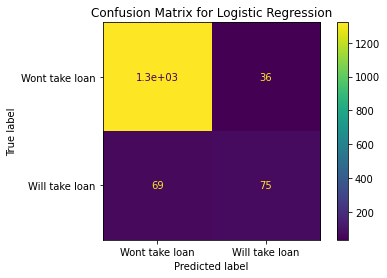

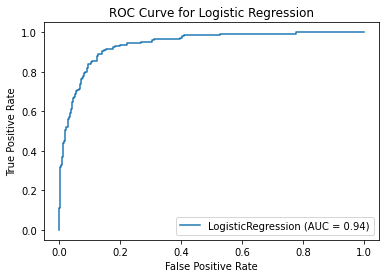

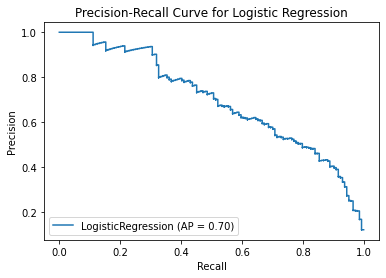

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

Thus,all the metrics related to logistic regression ,like precision, recall, etc are displayed.

# Step 8:Random Forest Classifier

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.97
Recall: 0.81


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

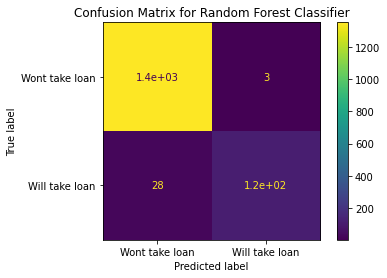

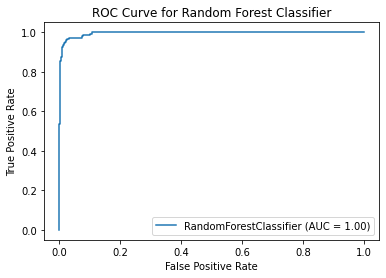

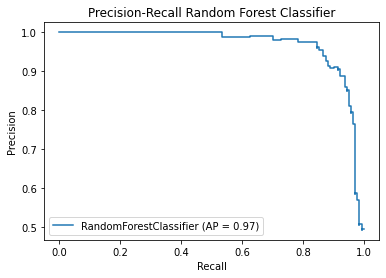

In [18]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

Since we get more precision, training accuracy and testing accuracy for random forest classifier, **Random forest classifier**  has better performance compared to other algorithms.

# Step 9: Business understanding of the model

Random forest algorithm can be used for both classifications and regression task. It provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.


The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

What do we need in order for our random forest to make accurate class predictions?
1)We need features that have at least some predictive power. After all, if we put garbage in then we will get garbage out.
2)The trees of the forest and more importantly their predictions need to be uncorrelated (or at least have low correlations with each other). While the algorithm itself via feature randomness tries to engineer these low correlations for us, the features we select and the hyper-parameters we choose will impact the ultimate correlations as well.


Here, we have built a model that will help to identify the potential customers who have a higher probability of purchasing the loan, which will in turn increase the success ratio.

We have first printed the details of the data provided, like the columns data type,replacing null values with the median, etc. We have also dropped the columns that have no effect on ur prediction model.

For this, we tried using different machine learning algorithms and found that Random forest classifier provides the best prediction model. We have usd 30 percent of the data to test and 70 percent of the data to train the model.

Observations:

1.Customers with annual income 100K to 200K are much more likely to accept personal loan. Customers with annual income less than 75K are much less likely to accept personal loan.

2.Customers with a CD account are much more likely to accept personal loan.

3.Customers with monthly credit card spending more than 3K are more likely to accept personal loan.

4.Customers with graduate and advanced education are more likely to accept personal loan than undergrad.

5.Customers accepting personal loans have a evenly distributed age from 20s to 60s.

6.Customers using Online Banking services are likely to accept Personal Loans.

Recommendation 1: Focus on VIP customers with annual income 100K to 200K or with a certificate of deposit account in the bank.

Recommendation 2: Focus on customers with monthly credit card spending more than 3K or with a family size of 3 and 4, or with graduate and advanced education.

Recommendation 3: Get more zip code geographical information and cluster them into several big groups that will help in analysis better.